### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# Any missing values?
review_na = reviews[reviews.isna().any(axis=1)]
review_na.shape

(0, 11)

In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews = reviews.drop(columns=['language', 'platform'])

# View column names.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [7]:
# Rename the column headers.
reviews = reviews.rename(columns={"remuneration (k£)": "remuneration", "spending_score (1-100)": "spending_score"})

# View column names.
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews.to_csv('clean_reviews.csv', index=False)

In [9]:
# Import new CSV file with Pandas.
clean_reviews = pd.read_csv('clean_reviews.csv')

# View DataFrame.
clean_reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [10]:
# Sense check the new dataframe
clean_reviews.shape

(2000, 9)

In [11]:
clean_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [12]:
clean_reviews.describe()

,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 5. Linear regression

### 5a) spending vs loyalty

In [13]:
# Independent variable.
x = clean_reviews['spending_score']

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        09:41:28   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [15]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663) + 33.061693 * clean_reviews['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

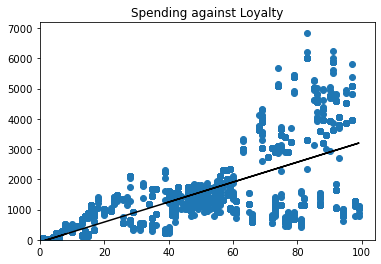

In [16]:
# Plot the graph with a regression line.
plt.scatter(x, y)
plt.plot(x, y_pred, color='black')
plt.xlim(0)
plt.ylim(0)
plt.title('Spending against Loyalty')
plt.show()

In [17]:
# Import the necessary library.
import statsmodels.stats.api as sms

# Run the Breusch-Pagan test function on the model residuals and x-variables.
BP_test = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, BP_test)))

{'LM stat': 629.982336021591, 'LM Test p-value': 5.042699614942813e-139, 'F-stat': 918.7507142907726, 'F-test p-value': 2.3037887924501407e-166}


### 5b) renumeration vs loyalty

In [18]:
# Independent variable.
x = clean_reviews['remuneration']

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        09:41:28   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [20]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.686513) + 34.187825 * clean_reviews['remuneration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

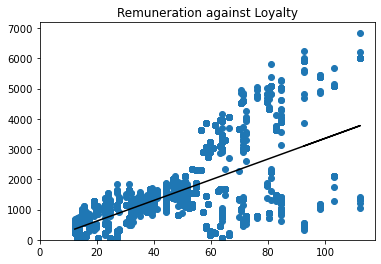

In [21]:
# Plot the graph with a regression line.
plt.scatter(x, y)
plt.plot(x, y_pred, color='black')
plt.xlim(0)
plt.ylim(0)
plt.title('Remuneration against Loyalty')
plt.show()

In [22]:
# Import the necessary library.
import statsmodels.stats.api as sms

# Run the Breusch-Pagan test function on the model residuals and x-variables.
BP_test = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, BP_test)))

{'LM stat': 1038.6445487288283, 'LM Test p-value': 7.153051772822205e-228, 'F-stat': 2158.6311344219334, 'F-test p-value': 3.68e-320}


### 5c) age vs loyalty

In [23]:
# Independent variable.
x = clean_reviews['age']

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0577
Time:                        09:41:29   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [25]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (1736.517739) + -4.012805 * clean_reviews['age']

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

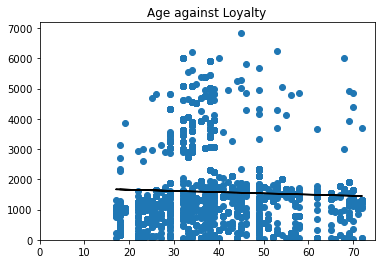

In [26]:
# Plot the graph with a regression line.
plt.scatter(x, y)
plt.plot(x, y_pred, color='black')
plt.xlim(0)
plt.ylim(0)
plt.title('Age against Loyalty')
plt.show()

In [27]:
# Import the necessary library.
import statsmodels.stats.api as sms

# Run the Breusch-Pagan test function on the model residuals and x-variables.
BP_test = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, BP_test)))

{'LM stat': 13.045150861307642, 'LM Test p-value': 0.00030407066519251314, 'F-stat': 13.11766668084642, 'F-test p-value': 0.0002998192355800465}


## 6. Observations and insights

***Your observations here...***






In [28]:
# Low R squared value shows poor goodness of fit for regressions. Clearly due to existing outliers.
# To help the business understand whether their loyalty points had any correlation with age, remuneration or spending scores I did a simple linear regression for each variable, with loyalty points being the dependant variable using the ‘statsmodel’ function on Python. 
# Then I mapped a regression line to see correlation. 
# The lines of best fit for spending and remuneration suggest there is some positive correlation between them and loyalty score. Turtle Games could benefit from looking deeper into spending and remuneration in future decisions. 
# Age and loyalty seem to have no obvious correlation. 
# The LM p values for all 3 are well below 0.05, meaning there is heteroscedasticity, which goes against one of the key assumptions required for this regression to be valid. 
# To explore further I would try to add other variables or transform the data.  
# This is however, inherently a limited method. 
# There is a high risk of the data being underfitted given only 2 variables are considered and this is seen through the low R2 values for all 3. 
# We work under the assumption of no multicollinearity. Furthermore, outliers are highly influential and impact the accuracy of the model. 
# We can see there are clusters of outliers circled in red.



# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [29]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [30]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('clean_reviews.csv')

# View DataFrame.
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [31]:
# Drop unnecessary columns.
df2 = df2[['remuneration', 'spending_score']]

# View DataFrame.
df2.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [32]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [33]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

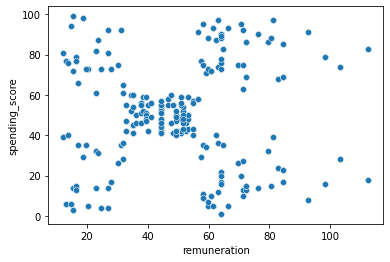

In [34]:
# Create a scatterplot with Seaborn.
sp = sns.scatterplot(x='remuneration', 
                     y='spending_score', 
                     data=df2)

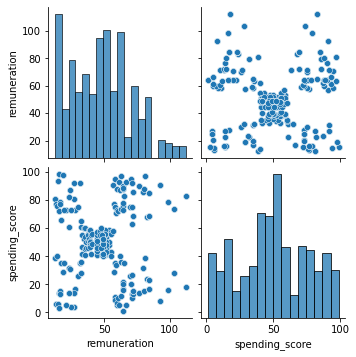

In [35]:
# Create a pairplot with Seaborn.
pp = sns.pairplot(df2)

## 3. Elbow and silhoutte methods

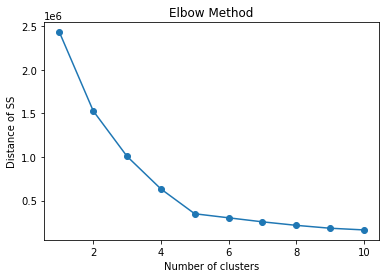

In [36]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                   init='k-means++',
                   max_iter=300,
                   n_init=10,
                   random_state=0)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

# Plot elbow method diagram
plt.plot(range(1, 11),
        ss,
        marker='o')

# Add labels and titles
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Distance of SS")
plt.show()

In [37]:
# The elbow is around 5 clusters

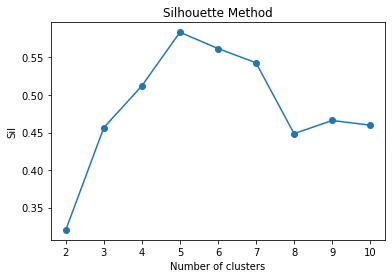

In [38]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10
for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric='euclidean'))
    
# Plot silhouette method diagram
plt.plot(range(2, kmax+1),
        sil,
        marker='o')

# Insert labels and titles
plt.title("Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")
plt.show()

In [39]:
# 5 cluster solution has the highest average silhouette coefficient

## 4. Evaluate k-means model at different values of *k*

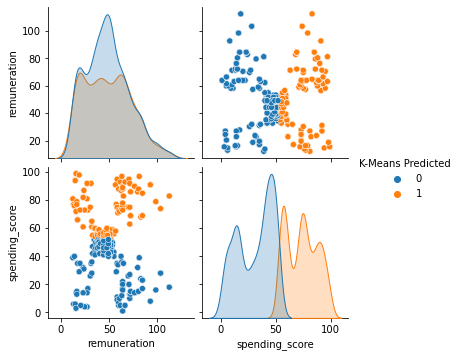

In [40]:
# Use 2 clusters:
kmeans = KMeans(n_clusters = 2,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [41]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    1106
1     894
Name: K-Means Predicted, dtype: int64

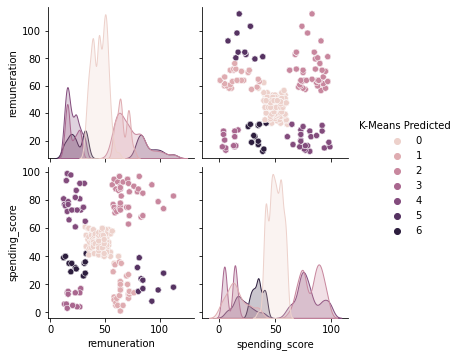

In [42]:
# Use 7 clusters:
kmeans = KMeans(n_clusters = 7,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [43]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    738
2    356
4    269
1    214
3    154
6    146
5    123
Name: K-Means Predicted, dtype: int64

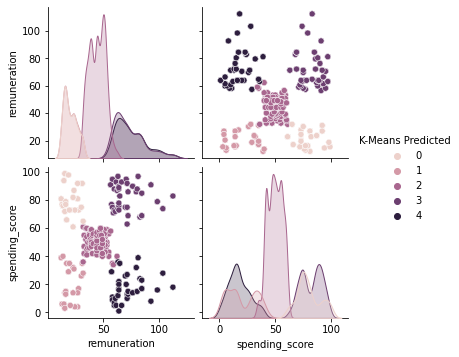

In [44]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [45]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

2    774
3    356
4    330
1    271
0    269
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

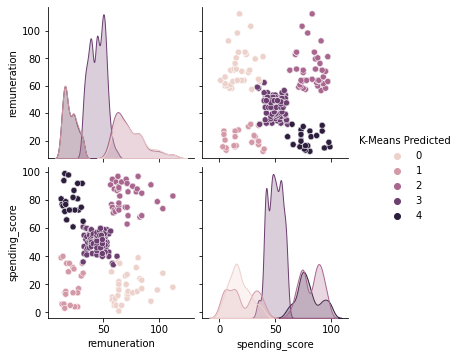

In [46]:
# Apply the final model - 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [47]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

3    774
2    356
0    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [48]:
# View the DataFrame.
print(df2.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

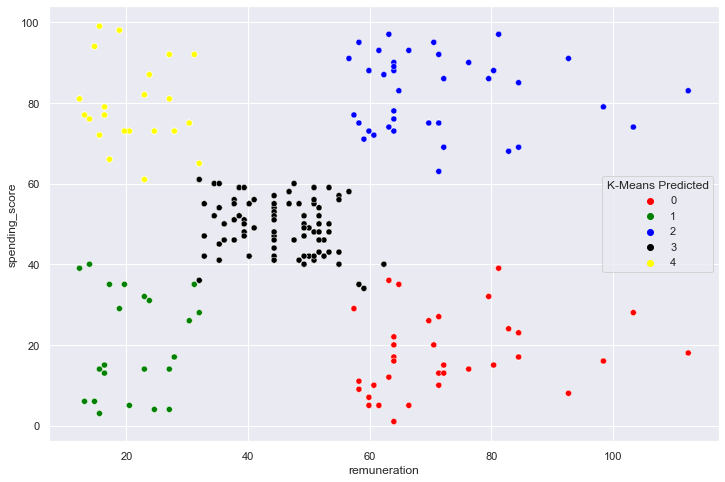

In [49]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2 , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'yellow'])


## 7. Discuss: Insights and observations

***Your observations here...***

In [ ]:
# To look into these the connection between remuneration and spending, we can do some cluster analysis. 
# Creating a new dataframe with only the 2 necessary columns made writing code much easier. 
# To see the best number of clusters to use on K-means clustering, I did an elbow and silhouette method.
# The elbow method looks at the within-cluster-sum of squared errors and shows the diminishing change in sum. 
# We see 5 clusters having an obvious divot here, suggesting it is a good number of clusters. 
# I then used the silhouette method to see the distance to other points in its cluster and others. 
# Again we see 5 being the highest, corroborating the result from the elbow method. 
# However, sometimes it is harder to see the optimal number if the clusters aren’t as naturally distinct as we have.
# To evaluate the accuracy of this value further, I made pairplots with 2, 5 and 7 clusters. 
# We see 2 clearly not being concise enough. 
# While 7 also looks quite well split, perhaps there are quite a few overlaps (red circles). 
# 5 looks to split each corner and the middle much more effectively. 
# Looking it at it closer, we see some close points between clusters (purple circles) but its not enough to justify more clusters. 
# For the business, we can see 5 distinct groups with varying levels of spending and remuneration which Turtle Games can try and target each group separately or at least look into each separately. 



# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [50]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import re

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [51]:
# Load the data set as df3.
df3 = pd.read_csv('clean_reviews.csv')

# View DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [52]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [53]:
# Descriptive statistics
df3.describe()

,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [54]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3.drop(columns=['gender', 'age', 
                        'remuneration','spending_score',
                        'loyalty_points','education',
                        'product'])

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [55]:
# Determine if there are any missing values.
df3_na = df3[df3.isna().any(axis=1)]
df3_na.shape

(0, 2)

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [56]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [57]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x:" ".join(x.lower() for x in x.split()))

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [58]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]', '')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [59]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[\.\?\!\,\:\;\"\'\*\(\)\£\$\%\^\&\@]', '')

# View output.
df3['summary']

0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2c) Drop duplicates in both columns

In [60]:
# Check duplicates
df3.summary.duplicated().sum()
df3.review.duplicated().sum()

50

In [61]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['review'])
df3 = df3.drop_duplicates(subset=['summary'])
df3 = df3.reset_index(drop=True)

In [62]:
# View DataFrame.
df3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1346,this is a fun card game for people who like wo...,this is a fun card game for people who like words
1347,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...
1348,great game to keep the mind active we play it ...,great game to keep the mind active
1349,we are retired and find this a great way to st...,a great mind game


## 3. Tokenise and create wordclouds

In [63]:
# Create new DataFrame (copy DataFrame).
df4 = df3

# View DataFrame.
df4

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1346,this is a fun card game for people who like wo...,this is a fun card game for people who like words
1347,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...
1348,great game to keep the mind active we play it ...,great game to keep the mind active
1349,we are retired and find this a great way to st...,a great mind game


In [64]:
# Apply tokenisation to both columns.
df4['review_tokens'] = df4['review'].apply(nltk.word_tokenize)
df4['summary_tokens'] = df4['summary'].apply(nltk.word_tokenize)

# View DataFrame.
df4.head()

,review,summary,review_tokens,summary_tokens
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [65]:
# Review: Create a word cloud.
reviews_c=''
for i in range(df4.shape[0]):
    reviews_c=reviews_c + df4['review'][i]
#reviews_wc=WordCloud().generate(df4['review_tokens'].to_string())
sns.set(color_codes=True)
reviews_wc=WordCloud(width=1600, height=900,
                     background_color='white',
                     colormap='plasma',
                     stopwords='none',
                     min_font_size=10).generate(reviews_c)

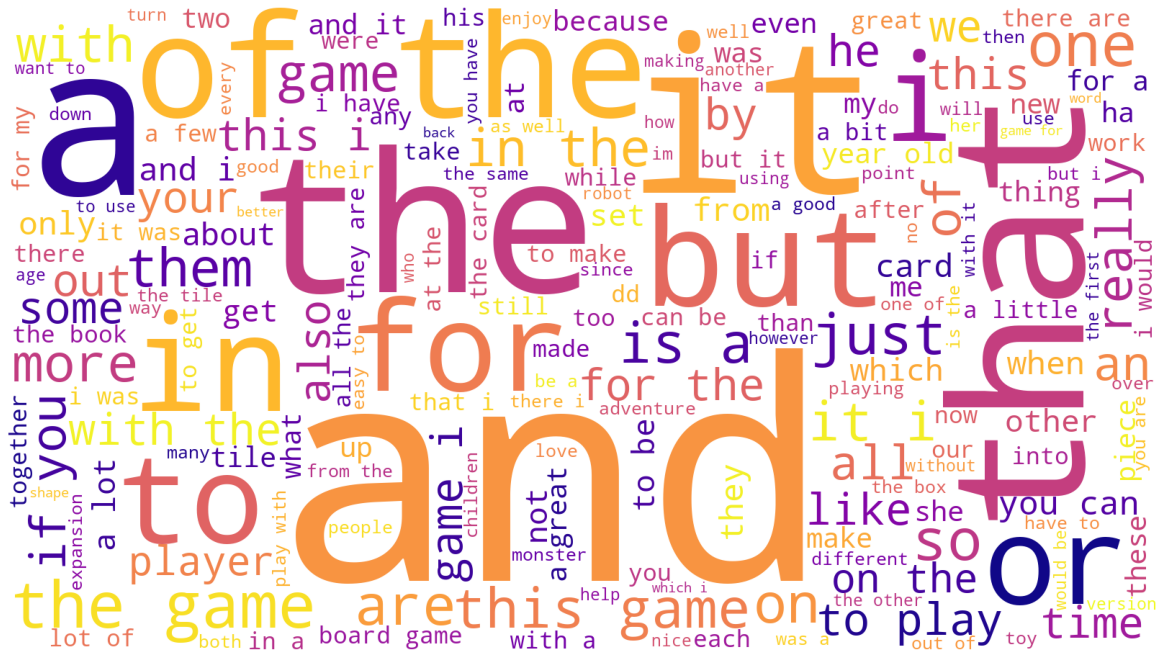

In [66]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16,9), facecolor=None)
plt.imshow(reviews_wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [67]:
# Summary: Create a word cloud.
summary_c=''
for i in range(df4.shape[0]):
    summary_c=summary_c + df4['summary'][i]
#reviews_wc=WordCloud().generate(df4['review_tokens'].to_string())
sns.set(color_codes=True)
reviews_wc=WordCloud(width=1600, height=900,
                     background_color='white',
                     colormap='plasma',
                     stopwords='none',
                     min_font_size=10).generate(summary_c)

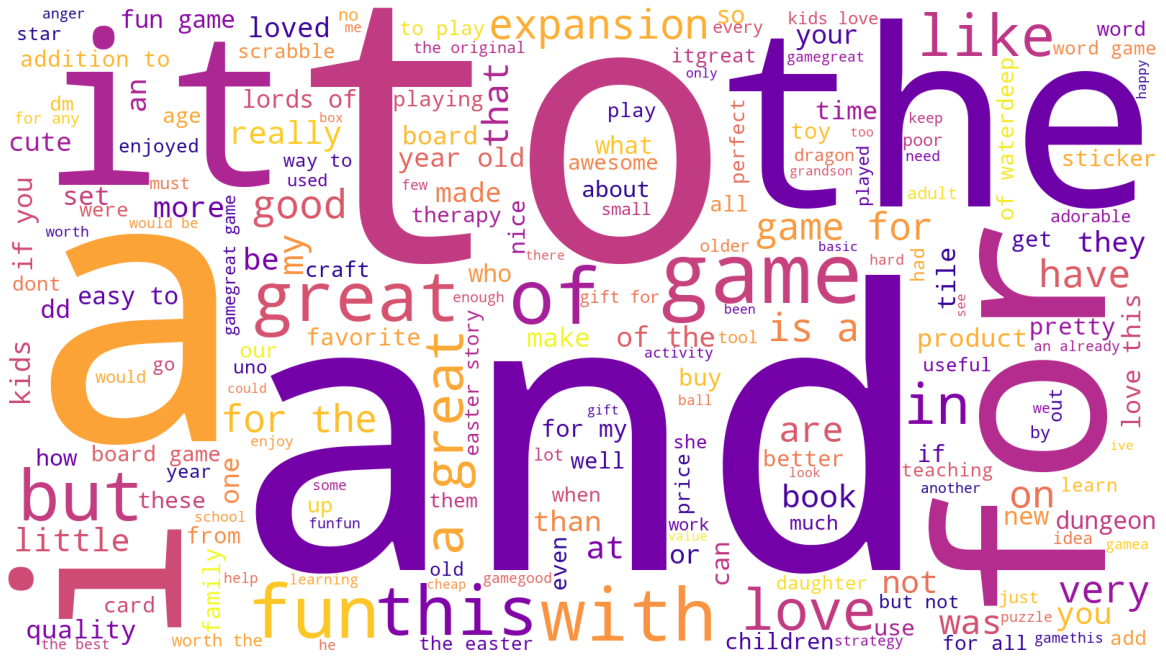

In [68]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16,9), facecolor=None)
plt.imshow(reviews_wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [69]:
# Determine the frequency distribution.
all_tokens=[]
for i in range(df4.shape[0]):
    all_tokens = all_tokens + df4['review_tokens'][i]
    all_tokens = all_tokens + df4['summary_tokens'][i]
    
fdist = FreqDist(all_tokens)
fdist

FreqDist({'the': 5278, 'and': 3105, 'a': 3069, 'to': 3035, 'of': 2392, 'it': 1972, 'i': 1970, 'is': 1697, 'this': 1674, 'game': 1626, ...})

### 4b) Remove alphanumeric characters and stopwords

In [70]:
# Delete all the alpanum.
tokens1 = [word for word in all_tokens if word.isalnum()]

In [71]:
# Remove all the stopwords
english_stopwords = set(stopwords.words('english'))
tokens2=[x for x in tokens1 if x.lower() not in english_stopwords]

tokens2_string= ''
for word in tokens2:
    tokens2_string=tokens2_string + word + ' '

### 4c) Create wordcloud without stopwords

In [72]:
# Create a wordcloud without stop words.
for i in range(df4.shape[0]):
    summary_c=summary_c + df4['summary'][i]
#reviews_wc=WordCloud().generate(df4['review_tokens'].to_string())
sns.set(color_codes=True)
reviews_wc=WordCloud(width=1600, height=900,
                     background_color='white',
                     colormap='plasma',
                     stopwords='none',
                     min_font_size=10).generate(tokens2_string)

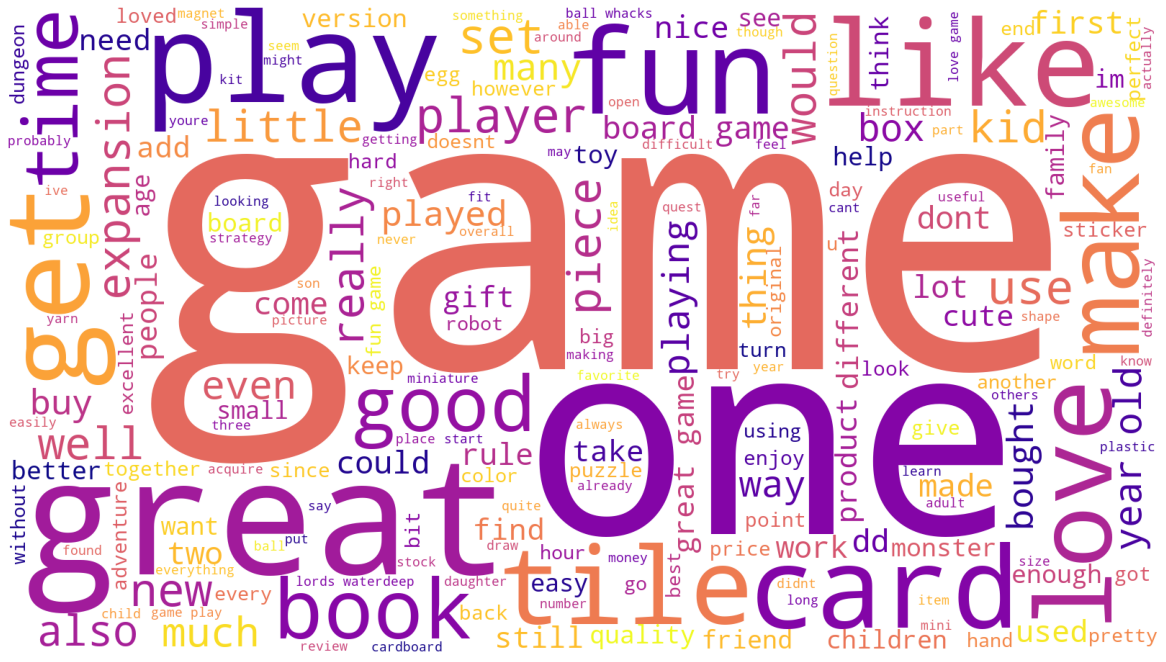

In [73]:
# Plot the wordcloud image.
plt.figure(figsize = (16,9), facecolor=None)
plt.imshow(reviews_wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 4d) Identify 15 most common words and polarity

In [74]:
# Determine the 15 most common words.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                     columns=['Word', 'Frequency']).set_index('Word')
counts

,Frequency
Word,
game,1626
great,628
fun,582
one,503
play,468
like,427
good,312
really,308
get,307


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [75]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [76]:
# Determine polarity of both columns. 
df4['review_polarity'] = df4['review'].apply(generate_polarity)
df4['summary_polarity'] = df4['summary'].apply(generate_polarity)
# View output.
df4.head()

,review,summary,review_tokens,summary_tokens,review_polarity,summary_polarity
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00


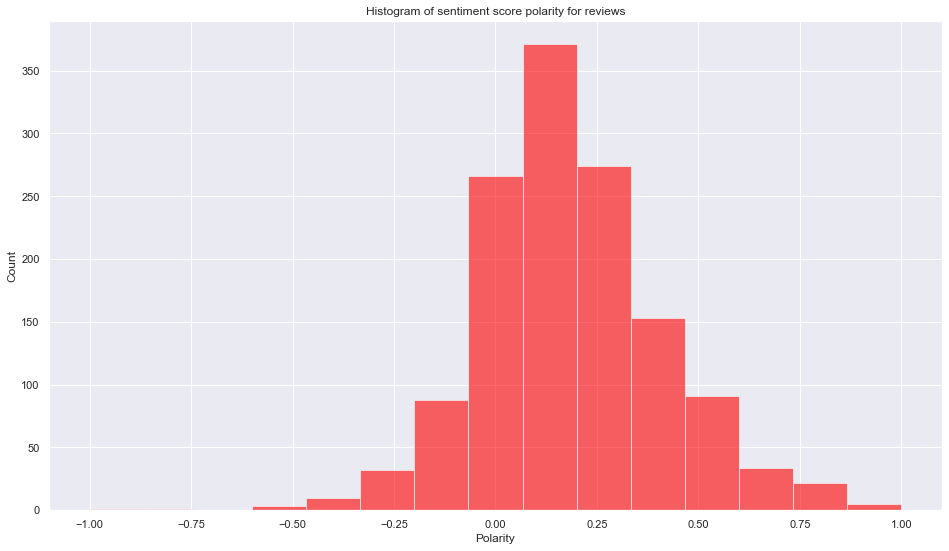

In [77]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins=15
plt.figure(figsize=(16,9))
n, bins, patches=plt.hist(df4['review_polarity'], num_bins, facecolor='red', alpha=0.6)

plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for reviews', fontsize=12)

plt.show()

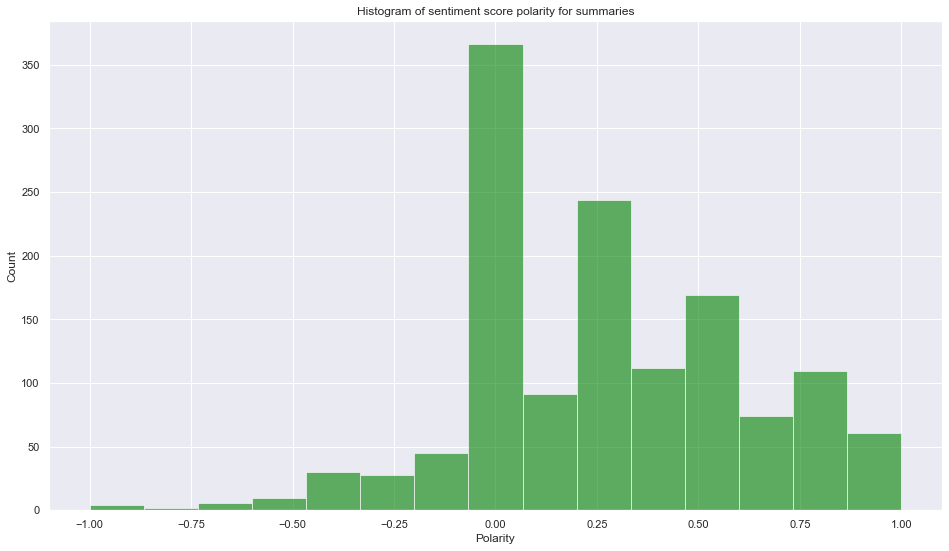

In [78]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins=15
plt.figure(figsize=(16,9))
n, bins, patches=plt.hist(df4['summary_polarity'], num_bins, facecolor='green', alpha=0.6)

plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for summaries', fontsize=12)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [79]:
# Top 20 negative reviews.
negative_reviews = df4.nsmallest(20, 'review_polarity')
negative_reviews = negative_reviews.drop(columns=['summary', 'summary_tokens','summary_polarity'])
# View output.
negative_reviews

,review,review_tokens,review_polarity
165,booo unles you are patient know how to measure...,"[booo, unles, you, are, patient, know, how, to...",-1.000000
147,incomplete kit very disappointing,"[incomplete, kit, very, disappointing]",-0.780000
267,one of my staff will be using this game soon s...,"[one, of, my, staff, will, be, using, this, ga...",-0.550000
90,i bought this as a christmas gift for my grand...,"[i, bought, this, as, a, christmas, gift, for,...",-0.500000
141,i sent this product to my granddaughter the po...,"[i, sent, this, product, to, my, granddaughter...",-0.491667
251,my 8 yearold granddaughter and i were very fru...,"[my, 8, yearold, granddaughter, and, i, were, ...",-0.446250
382,i purchased this on the recommendation of two ...,"[i, purchased, this, on, the, recommendation, ...",-0.440741
312,this game although it appears to be like uno a...,"[this, game, although, it, appears, to, be, li...",-0.400000
355,my son loves playing this game it was recommen...,"[my, son, loves, playing, this, game, it, was,...",-0.400000
714,if you like me used to play dd but now you and...,"[if, you, like, me, used, to, play, dd, but, n...",-0.400000


In [80]:
# Top 20 negative summaries.
negative_summaries = df4.nsmallest(20, 'summary_polarity')
negative_summaries = negative_summaries.drop(columns=['review', 'review_tokens','review_polarity'])

# View output.
negative_summaries

,summary,summary_tokens,summary_polarity
17,the worst value ive ever seen,"[the, worst, value, ive, ever, seen]",-1.000000
165,boring unless you are a craft person which i am,"[boring, unless, you, are, a, craft, person, w...",-1.000000
588,boring,[boring],-1.000000
838,before this i hated running any rpg campaign d...,"[before, this, i, hated, running, any, rpg, ca...",-0.900000
1,another worthless dungeon masters screen from ...,"[another, worthless, dungeon, masters, screen,...",-0.800000
116,disappointed,[disappointed],-0.750000
266,promotes anger instead of teaching calming met...,"[promotes, anger, instead, of, teaching, calmi...",-0.700000
635,too bad this is not what i was expecting,"[too, bad, this, is, not, what, i, was, expect...",-0.700000
638,bad quality-all made of paper,"[bad, quality-all, made, of, paper]",-0.700000
144,at age 31 i found these very difficult to make,"[at, age, 31, i, found, these, very, difficult...",-0.650000


In [81]:
# Top 20 positive reviews.
positive_reviews = df4.nlargest(20, 'review_polarity')
positive_reviews = positive_reviews.drop(columns=['summary', 'summary_tokens','summary_polarity'])
# View output.
positive_reviews

,review,review_tokens,review_polarity
565,perfect,[perfect],1.000000
1081,my daughter loves her stickers awesome seller ...,"[my, daughter, loves, her, stickers, awesome, ...",1.000000
1336,perfect for tutoring my grandson in spelling,"[perfect, for, tutoring, my, grandson, in, spe...",1.000000
470,again a great price for a puzzle the best part...,"[again, a, great, price, for, a, puzzle, the, ...",0.900000
891,the best part i see is the box what a wonderfu...,"[the, best, part, i, see, is, the, box, what, ...",0.880000
499,great quality very cute and perfect for my tod...,"[great, quality, very, cute, and, perfect, for...",0.816667
31,the pictures are great ive done one and gave ...,"[the, pictures, are, great, ive, done, one, an...",0.800000
336,great seller happy with my purchase 5 starrrr,"[great, seller, happy, with, my, purchase, 5, ...",0.800000
439,great easter gift for kids,"[great, easter, gift, for, kids]",0.800000
492,these are great,"[these, are, great]",0.800000


In [82]:
# Top 20 positive summaries.
positive_summaries = df4.nlargest(20, 'summary_polarity')
positive_summaries = positive_summaries.drop(columns=['review', 'review_tokens','review_polarity'])
# View output.
positive_summaries

,summary,summary_tokens,summary_polarity
5,best gm screen ever,"[best, gm, screen, ever]",1.0
23,wonderful designs,"[wonderful, designs]",1.0
27,perfect,[perfect],1.0
61,theyre the perfect size to keep in the car or ...,"[theyre, the, perfect, size, to, keep, in, the...",1.0
107,perfect for preschooler,"[perfect, for, preschooler]",1.0
112,awesome sticker activity for the price,"[awesome, sticker, activity, for, the, price]",1.0
132,awesome book,"[awesome, book]",1.0
133,he was very happy with his gift,"[he, was, very, happy, with, his, gift]",1.0
150,awesome,[awesome],1.0
166,awesome and well-designed for 9 year olds,"[awesome, and, well-designed, for, 9, year, olds]",1.0


## 7. Discuss: Insights and observations

***Your observations here...***

In [ ]:
# We can analyse customer reviews for Turtle Games using natural language processing to achieve this. 
# I needed to prepare the review data before using Python functions. 
# This involved making the words lower case and remove punctuation. 
# With more time, I would have also stemmed and lemmatised the data to simplify the words more. 
# However, even without doing this our wordclouds showed some good insights. 
# Removing stopwords was essential since ‘and’, ‘that’ and ‘the’ were most popular prior. 
# After removing them however, we get this. 
# Besides the obvious ‘game’, we see ‘great’, ‘like’, ‘love’ and ‘fun’ in large with minimal negative words. 
# We can infer that TurtleGames reviews are generally very positive and in favour of their products. 
# This signals that marketing has been effective and should be focused on as it is.
# Creating polarity and sentiment histograms compliments this, with most bars on the positive side of both histograms. 
# The top 20 positive and negative values show the same trend. 
# Negative polarity goes from -1 to -0.3, while the positive polarity does from 1 to 0.8. 
# While the sentiment analysis may not be perfectly accurate since words and phrases can be complex to analyse, we see a common trend through all visualisations, which is a good sign for the company.












# 